## Team 3Musketeers 

* Saloni Sharad Bhalerao 012466623
* Ravali Nagabandi 011530454
* Anu Sebastian 012496276


Github: https://github.com/anuksebastian/3musketeers


## Forest Fire Prediction 

The diagram below illustrates the components of the FWI System. Calculation of the components is based on consecutive daily observations of temperature, relative humidity, wind speed, and 24-hour rainfall. The six standard components provide numeric ratings of relative potential for wildland fire. 


<img src="ffvariable.PNG" alt="Forest Fire Prediction" width="600"/>


### Fine Fuel Moisture Code

The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.
Duff Moisture Code

### Duff Moisture Code 

The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.
Drought Code

### Drought Code 

The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

### Initial Spread Index

The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It combines the effects of wind and the FFMC on rate of spread without the influence of variable quantities of fuel.
Buildup Index

### Buildup Index

The Buildup Index (BUI) is a numeric rating of the total amount of fuel available for combustion. It combines the DMC and the DC.
Fire Weather Index

### Fire Weather Index 

The Fire Weather Index (FWI) is a numeric rating of fire intensity. It combines the Initial Spread Index and the Buildup Index. It is suitable as a general index of fire danger throughout the forested areas of Canada. 

## Attribute Information 

This data set is sourced from the UCI Machine Learning Repository.

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

## Business Objective  

To analyze the dataset for forest fires and predict the occurence of fires caused by weather conditions. The high alert areas can then be closely monitored for fire breakouts.

## K-Means

### Data Wrangling and Preparation
   Studied the different dimensions in the dataset and visualized using scatterplot. We choose temp, rh (Relative Humidity) and wind for clustering using K-means algorithm. Checked for missing data – there was no missing data for the dimensions chosen. 
Dataset source: https://archive.ics.uci.edu/ml/datasets/forest+fires


## Feature Selection 

One of the important part of the forest fire prediction dataset
was to understand which features can be used for predicting the forest fire in a particular area


In [1]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans 
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams["patch.force_edgecolor"] = True

%matplotlib inline

In [2]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('C:/Fall2018/ML/datasets/forestfires.csv')

###  Pair Plot 
To understand the correlation between the dependent and independent variables and also between the independent vaiables.

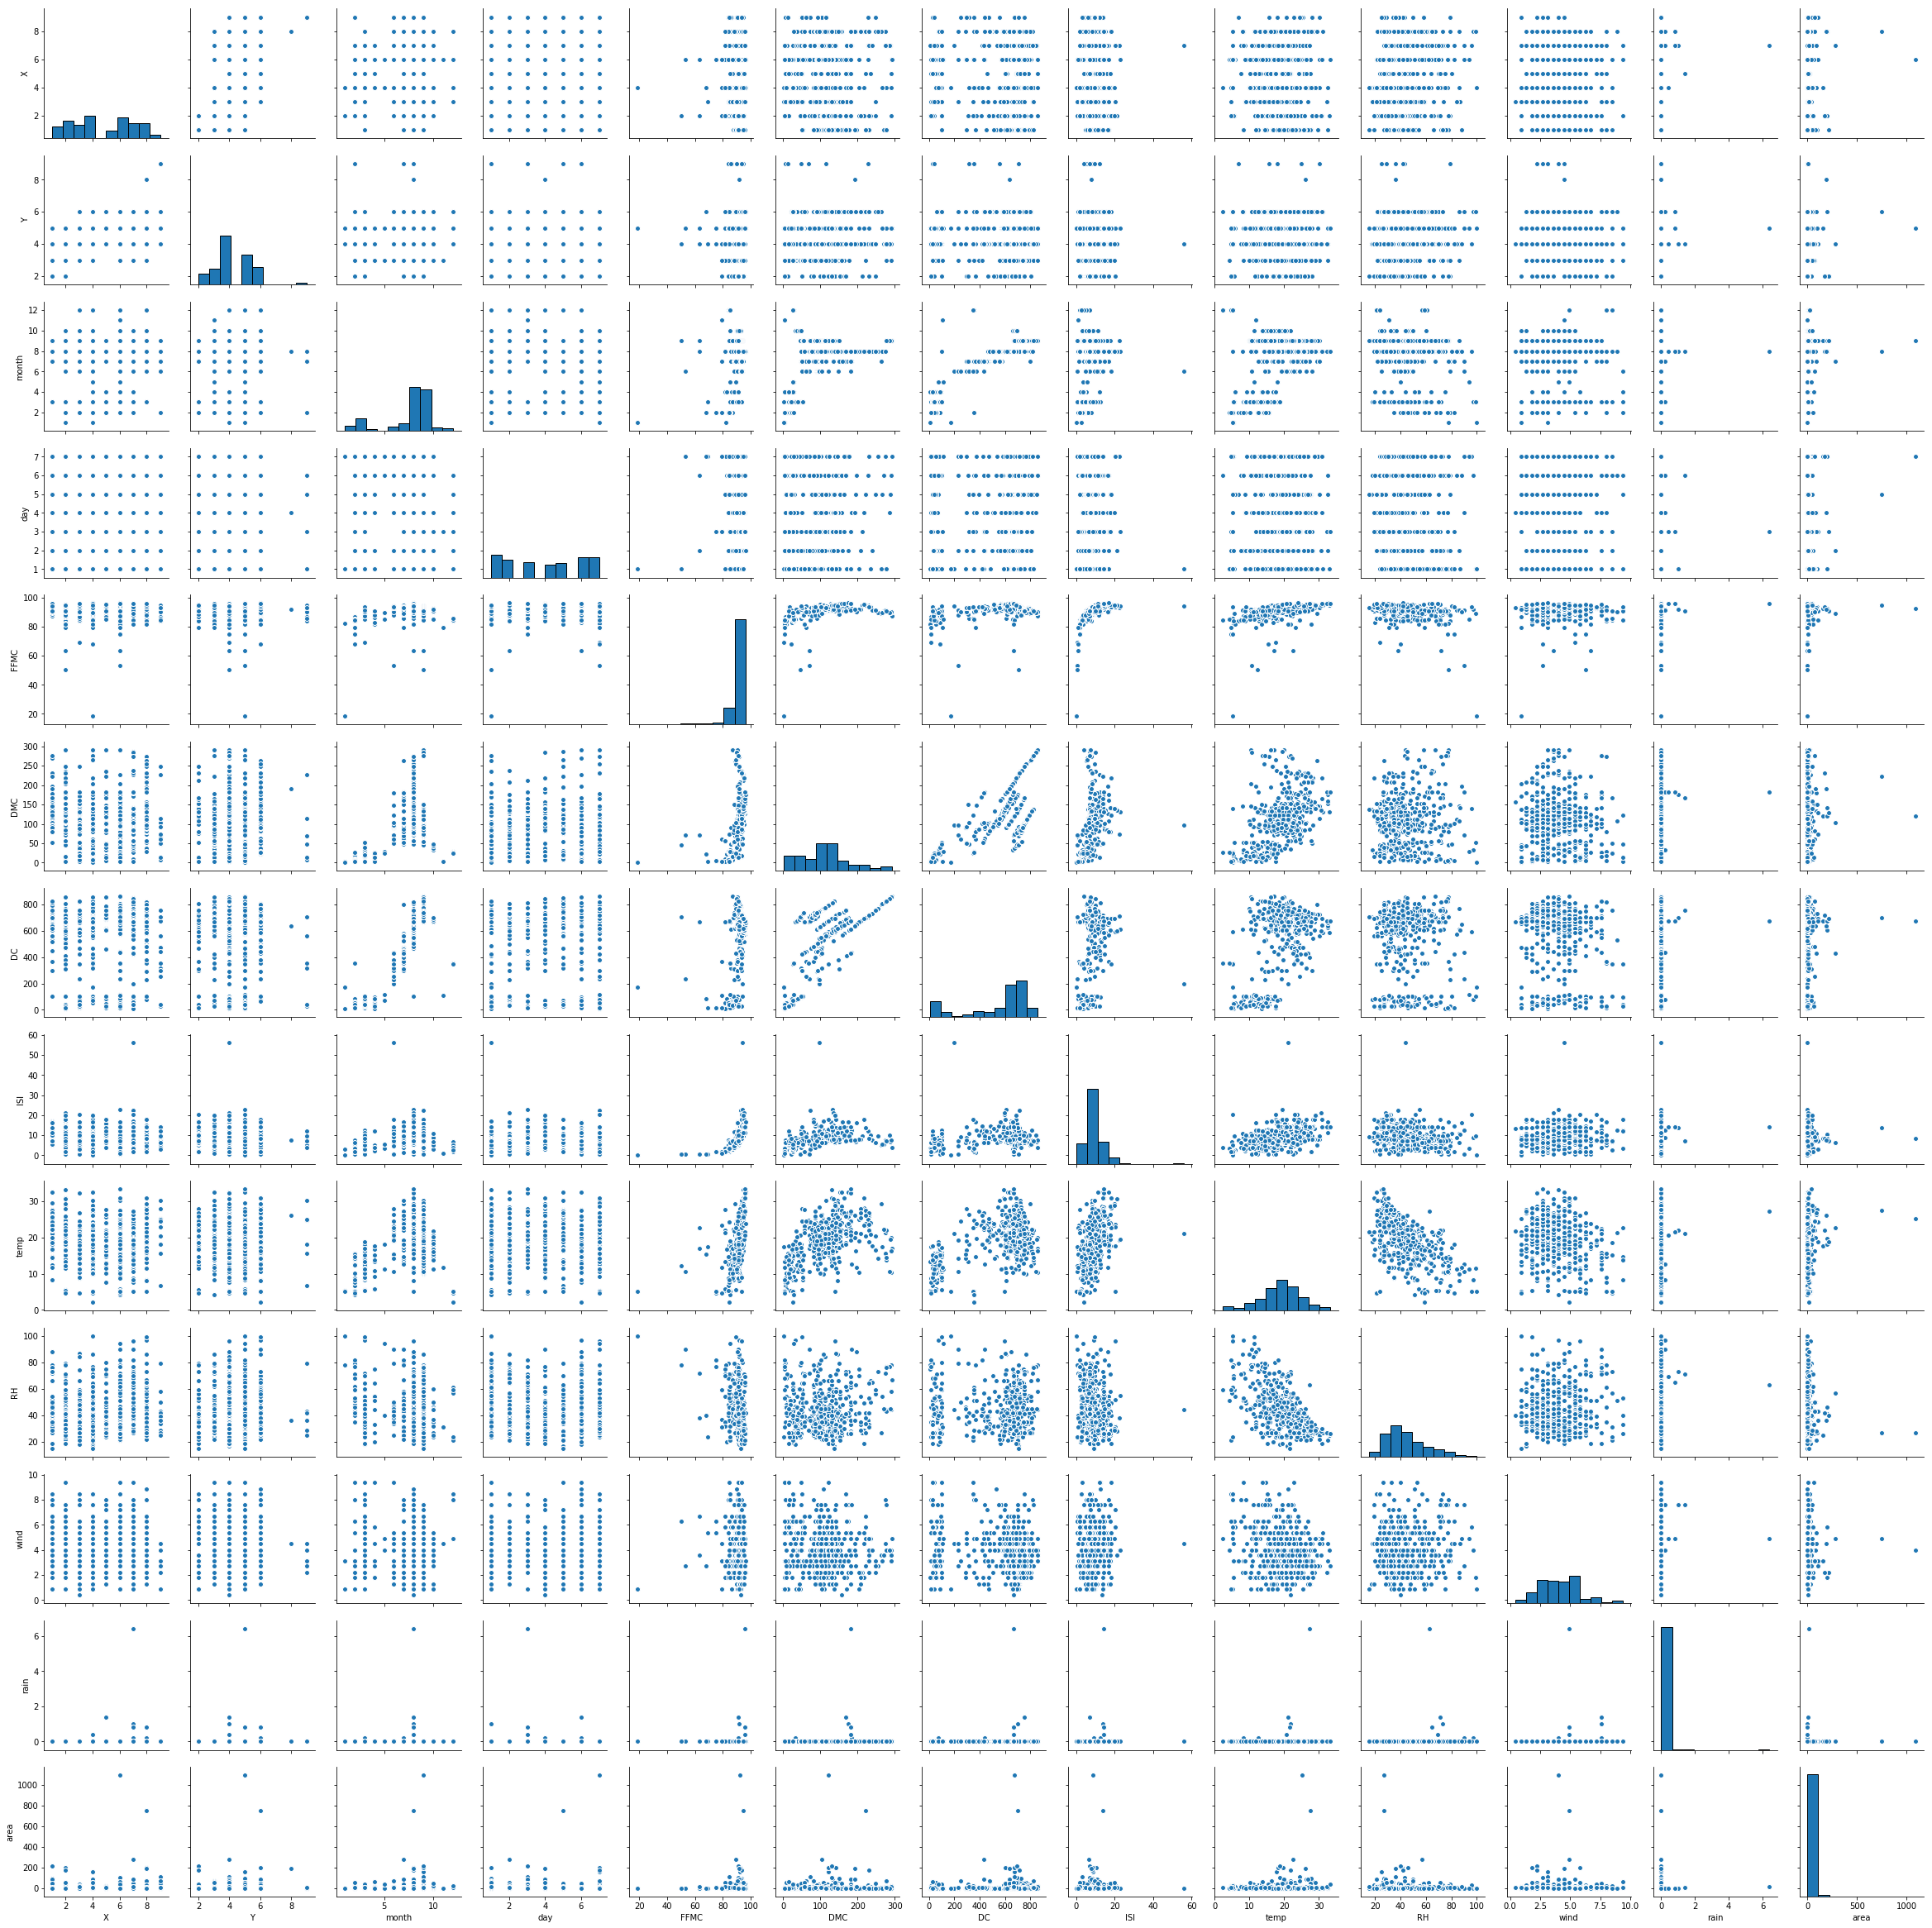

In [3]:
sns.pairplot(dataset)


### Correlation between the predictor and predicted variable 
'temp' has the highest correlation with the area of forest fire, followed by 'RH'(high humidity low chances of fire), 'Rain' has the least correlation


In [4]:
print("Correlation:", dataset.corr(method='pearson'))

Correlation:               X         Y     month       day      FFMC       DMC        DC  \
X      1.000000  0.539548 -0.065003  0.013037 -0.021039 -0.048384 -0.085916   
Y      0.539548  1.000000 -0.066292 -0.013085 -0.046308  0.007782 -0.101178   
month -0.065003 -0.066292  1.000000 -0.037469  0.291477  0.466645  0.868698   
day    0.013037 -0.013085 -0.037469  1.000000  0.073597  0.028697  0.001913   
FFMC  -0.021039 -0.046308  0.291477  0.073597  1.000000  0.382619  0.330512   
DMC   -0.048384  0.007782  0.466645  0.028697  0.382619  1.000000  0.682192   
DC    -0.085916 -0.101178  0.868698  0.001913  0.330512  0.682192  1.000000   
ISI    0.006210 -0.024488  0.186597  0.035926  0.531805  0.305128  0.229154   
temp  -0.051258 -0.024103  0.368842  0.032233  0.431532  0.469594  0.496208   
RH     0.085223  0.062221 -0.095280 -0.083318 -0.300995  0.073795 -0.039192   
wind   0.018798 -0.020341 -0.086368 -0.004013 -0.028485 -0.105342 -0.203466   
rain   0.065387  0.033234  0.013438 -0.

### Feature Selection

Identified from the correlation data and RFE that DMC,Temp,Wind,RH are important features in predicting fires.

In [5]:
ds = dataset.values


X = ds[:,0:12]
Y = ds[:,12]

#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False False False False False  True False False False  True  True False]
Feature Ranking:  [ 5  3  6  4  9  1  2  8  7  1  1 10]


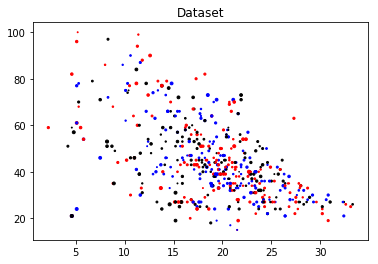

In [12]:
#Temp,RH,Wind
x = dataset.iloc[:, [8,9,10]].values
plt.scatter(dataset.iloc[:,8],dataset.iloc[:,9],dataset.iloc[:,10],color=['black','red','blue'])
plt.title('Dataset')
plt.show()

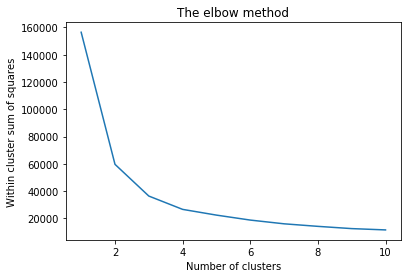

In [13]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') #within cluster sum of squares
plt.show()


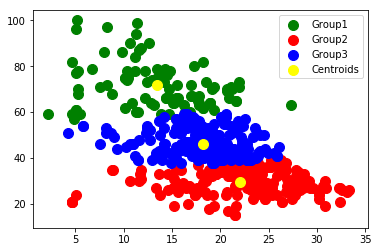

In [16]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Group1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Group2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Group3')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Clustering Criteria

High Temperature and High Winds indicates the possibility of forest fire – this when combined with relative humidity brings up or down the chance of fire. We would like to collapse these dimensions to a PCA and factor in area affected by the fire, to understand which particular area/areas will be affected by the extreme weather conditions and are prone to forest fires (on a scale of x to y: x is high, and y is low).


## GMM - Gaussian Mixture Model 

Objective: To analyze the dataset for forest fires and to determine the optimal number of clusters. The optimal number of clusters would give information regarding the different combinations of weather conditions – like temp, wind, RH that lead to forest fires.

### Data Wrangling and Preparation

Studied the different dimensions in the dataset and visualized using scatterplot. We choose temp and wind for clustering using K-means algorithm. Converted day and month data represented by strings to numeric values.

In [17]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams["patch.force_edgecolor"] = True
from sklearn.mixture import GaussianMixture

%matplotlib inline

In [18]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('C:/Fall2018/ML/datasets/forestfires.csv')
#Temp,RH,Wind
X = dataset.iloc[:, [8,10]].values

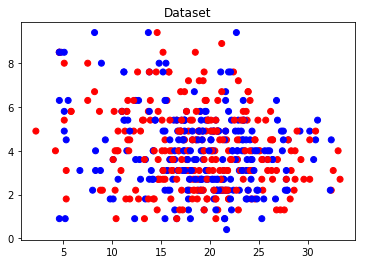

In [19]:
x = dataset.iloc[:, [8,10]].values
plt.scatter(dataset.iloc[:,8],dataset.iloc[:,10],color=['red','blue'])
plt.title('Dataset')
plt.show()

The number of clusters as determined by K-means is 4. The value of k was not clear from the elbow chart. As seen from the below chart it could be k=3 or k=4 – both cases looked good.
<img src="index.PNG" alt="Elbow Chart"/>


This is one of the drawbacks of k-means. To overcome this we apply GMM to the dataset to understand the clustering more precisely.

In [20]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
#X, y_true=make_blobs(n_samples=400, centers=4,
                       #cluster_std=0.60, random_state=0)
#X = X[:, ::-1] # flip axes for better plotting

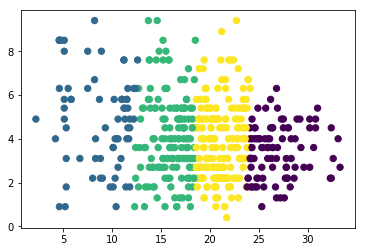

In [21]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

We have applied the number of clusters as 4 and plotted the scatter plot with different covars like ‘full’,’diag’.


In [22]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=3, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

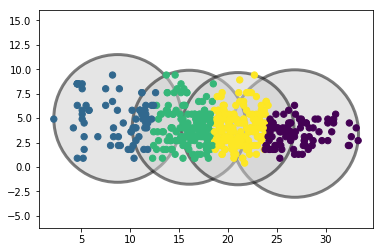

In [23]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

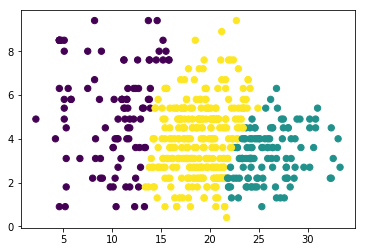

In [24]:
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

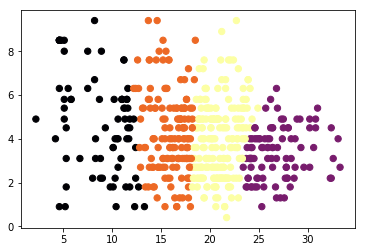

In [25]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='inferno');

In [26]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.991 0.    0.009 0.   ]
 [0.028 0.029 0.495 0.448]
 [0.243 0.004 0.697 0.055]
 [0.992 0.    0.008 0.   ]
 [0.84  0.    0.159 0.001]]


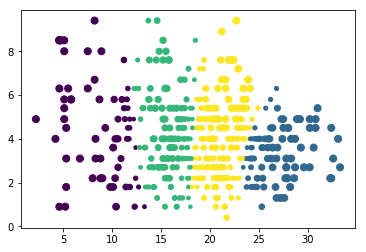

In [27]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [28]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

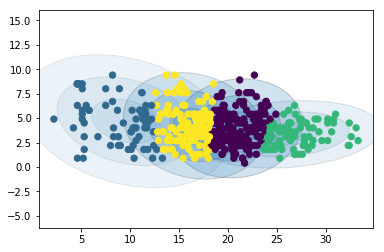

In [29]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

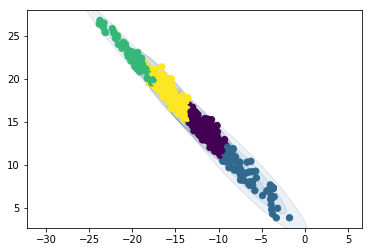

In [30]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

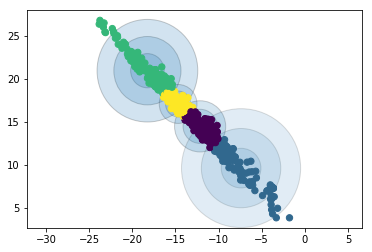

In [31]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

gmm = GaussianMixture(n_components=4, covariance_type='diag', random_state=42)
plot_gmm(gmm, X_stretched)

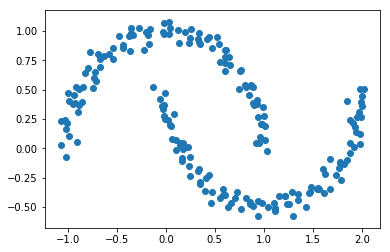

In [32]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200,noise =0.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

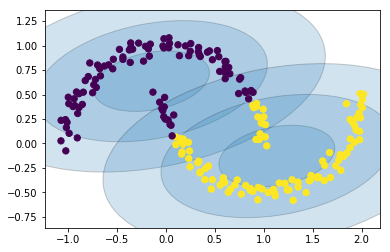

In [33]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

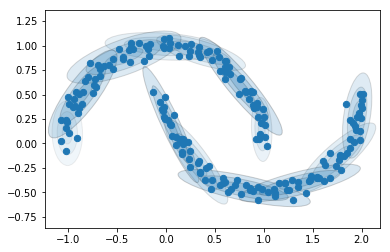

In [34]:
gmm16 = GaussianMixture(n_components=13, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

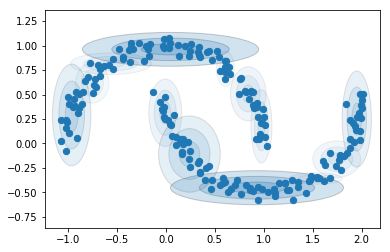

In [35]:
gmm16 = GaussianMixture(n_components=13, covariance_type='diag', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

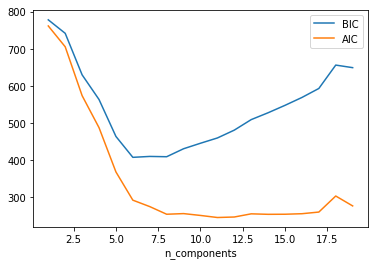

In [36]:
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

- From AIC it can be known that the n_components can be between 10 to 12 and 
- From BIC which is much simpler model it can be seen that n_components is 6.

So we are re-plotting with k=6 to understand how the clustering comes together.

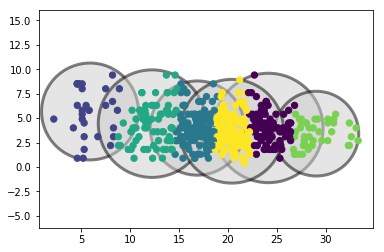

In [37]:
kmeans = KMeans(n_clusters=6, random_state=0)
plot_kmeans(kmeans, X)

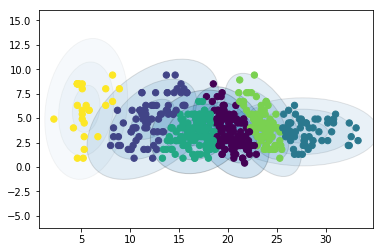

In [38]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, random_state=42)
plot_gmm(gmm, X)

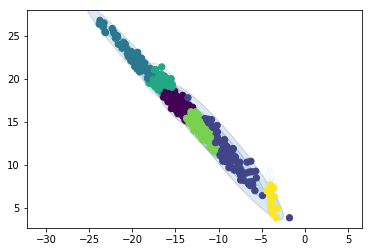

In [39]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

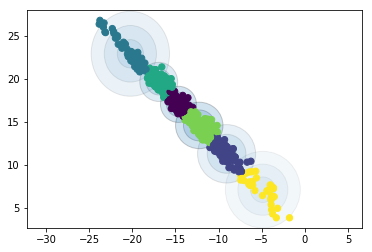

In [40]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

gmm = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)
plot_gmm(gmm, X_stretched)

## Hierarchical Clustering

In [41]:
# Hierarchial clustering of forest fire data 
import pandas as pd

# remove attribute rain from the DataFrame
varieties = list(dataset.pop('rain'))

# extract the measurements as a NumPy array
samples = dataset.values

In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [43]:
mergings = linkage(samples, method='complete')

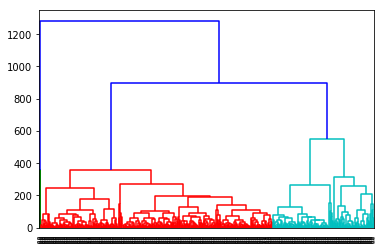

In [44]:
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
)
plt.show()

 Using Hierarchial clustering  we can broadly classify the data as 2  distinct hierarchial clusters.

## Latent Manifold and Regression

### Team Contribution

    - Data Preperation and PCA application to reduce dimensionality – Saloni
    - Data Enhancement and Linear Regression - Training / Testing of the model - Ravali
    - Latent Variable Identification and Linear regression – OLS method - Anu


Objective: To analyze the dataset for forest fires and to train the model by applying linear regression and to predict intensity of forest fires by testing the model. Below are the components needed to identify the FWI - Fire Weather Index (intensity of fire)

###  Data Wrangling and Preparation

Studied the different dimensions in the dataset and visualized using scatterplot. We have converted day and month data from strings to numeric values. From the forest fire database the columns 0 thru 11(X, Y, FFMC, DMC, DC, temp, wind, rain, RH, ISI, day and month) are predictor or independent variables and column 12 (area) is the dependent or predicted variables.

### Data Enrichment

We have added additional column named as “category” and we have populated this column by grouping area values into five categories.

In [45]:
%matplotlib inline

import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np  

from pandas.tools.plotting import scatter_matrix
from math import ceil


In [46]:
#Load the dataset
dataset = pandas.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')

In [47]:
# Show first rows
dataset.head()  

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [48]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.272727
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.626522
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,4.000000


In [49]:
fires_attributes = dataset.columns.values.tolist()
number_of_columns = len(fires_attributes)

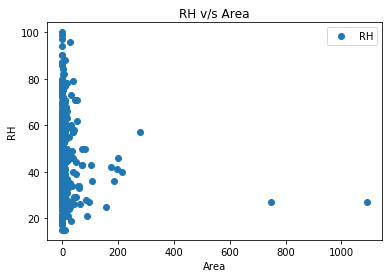

In [50]:

dataset.plot(x='area', y='RH', style='o')  
plt.title('RH v/s Area')  
plt.xlabel('Area')  
plt.ylabel('RH')  
plt.show()


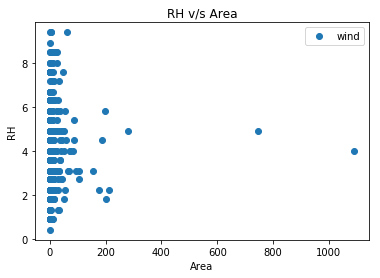

In [51]:
dataset.plot(x='area', y='wind', style='o')  
plt.title('RH v/s Area')  
plt.xlabel('Area')  
plt.ylabel('RH')  
plt.show()

In [52]:
dataset[dataset['area'] > 250]


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,4
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,3
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,2


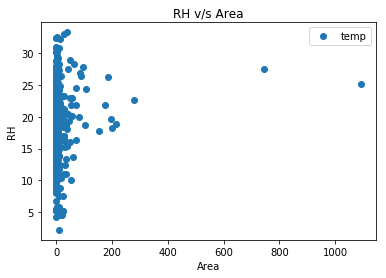

In [53]:
dataset.plot(x='area', y='temp', style='o')  
plt.title('RH v/s Area')  
plt.xlabel('Area')  
plt.ylabel('RH')  
plt.show()

In [54]:
# Show correlation between variables
dataset.corr()   


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385,0.061010
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873,0.006859
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.030932
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.052846
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.049033
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,-0.016523
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.058293
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.050356
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.053379
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,0.034965


### Data Preparation

Converted month and day from strings to numeric values which we can see below.


In [55]:
# Data preperation - Convert month and day from string values to numerical values
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

dataset['month'] = [months_table.index(month) for month in dataset['month'] ]
dataset['day'] =   [days_table.index(day)     for day   in dataset['day']   ]

dataset['X'] -= 1
dataset['Y'] -= 2

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,6,3,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,6,2,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,6,2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,7,4,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,7,4,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [56]:
# Excluding row headers
for idx in list(range(4, number_of_columns - 1)):  
    dataset[fires_attributes[idx]] = dataset[fires_attributes[idx]] - \
                                   dataset[fires_attributes[idx]].mean()

Applied Ordinary Least Square Method (OLS) and tried printing OLS regression results.

In [57]:
statistics = [dataset[fires_attributes[idx]].mean() for idx in range(0, number_of_columns)]
statistics = pandas.DataFrame(statistics, 
                              index=fires_attributes,
                              columns=['mean'])

In [58]:
# Mean for FFMC through Rain is 0.000
statistics.T


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
mean,3.669246,2.299807,6.475822,2.972921,2.319091e-13,-1.665721e-14,4.511190e-13,-3.411842e-15,1.504921e-15,9.029528e-15,-7.868196e-16,4.262655e-17,4.892712e-15,0.272727


In [59]:
 statistics = list()
# Apply OLS and Print OLS regression results
for idx in range(0, number_of_columns - 1):
    model = smf.ols(formula = "area ~ " + 
                    fires_attributes[idx], data = dataset).fit()
    title = 'Model: area ~ ' + fires_attributes[idx]
    print('area vs ' + fires_attributes[idx])
    print(model.summary())
    statistics.append([model.f_pvalue, model.rsquared])

area vs X
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.077
Date:                Tue, 23 Oct 2018   Prob (F-statistic):              0.150
Time:                        23:48:51   Log-Likelihood:                -2879.4
No. Observations:                 517   AIC:                             5763.
Df Residuals:                     515   BIC:                             5771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3986      5.247     -1.22

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
area vs RH
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.954
Date:                Tue, 23 Oct 2018   Prob (F-statistic):             0.0863
Time:                        23:48:51   Log-Likelihood:                -2879.0
No. Observations:                 517   AIC:                             5762.
Df Residuals:                     515   BIC:                             5770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [60]:
statistics = pandas.DataFrame(statistics, 
                              index=fires_attributes[: number_of_columns - 1], 
                              columns=['p-value', 'R-squared'])
statistics.T

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
p-value,0.150096,0.308510,0.199669,0.272398,0.362592,0.097335,0.262363,0.851418,0.026101,0.086271,0.779939,0.867310,0.0
R-squared,0.004018,0.002014,0.003192,0.002339,0.001610,0.005328,0.002439,0.000068,0.009573,0.005703,0.000152,0.000054,1.0


In [61]:
statistics[statistics['p-value'] < 0.10]


,p-value,R-squared
DMC,0.097335,0.005328
temp,0.026101,0.009573
RH,0.086271,0.005703
area,0.000000,1.000000


The 'p-value' value of temp is less than 0.05 suggesting it as a good candidate for linear regression.

In [62]:
statistics[statistics['p-value'] < 0.05]


,p-value,R-squared
temp,0.026101,0.009573
area,0.000000,1.000000


In [63]:
print((smf.ols(formula = "area ~ temp", data = dataset).fit()).summary())


                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.978
Date:                Tue, 23 Oct 2018   Prob (F-statistic):             0.0261
Time:                        23:48:55   Log-Likelihood:                -2878.0
No. Observations:                 517   AIC:                             5760.
Df Residuals:                     515   BIC:                             5768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.442e-15      2.789   8.76e-16      1.0

In [64]:
# Combination of all variables
explanatory_variables = "X + Y + month + day + FFMC + DMC + DC + ISI + temp + RH + " + \
                        "wind + rain"
response_variable =     "area"

model = smf.ols(formula = response_variable + " ~ " + explanatory_variables, 
                data = dataset).fit()

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.092
Date:                Tue, 23 Oct 2018   Prob (F-statistic):              0.364
Time:                        23:48:56   Log-Likelihood:                -2873.8
No. Observations:                 517   AIC:                             5774.
Df Residuals:                     504   BIC:                             5829.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.4447     19.340     -1.574      0.1

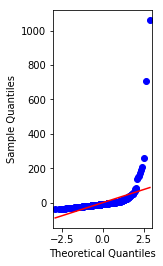

In [65]:
print(model.summary())
ax1 = plt.subplot(1, 3, 1)
qq_plot = sm.qqplot(model.resid, line = 'r', ax = ax1)


Generated Linear Models adding one explanatory variable at a time.

## PCA - Principal Component Analysis 


    - Latent variable1 - BUI = DMC + DC
    - Latent variable2 - FWI = DMC + DC + ISI


In [66]:
import pandas as pd

# load dataset into Pandas DataFrame
dataset = pandas.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')

In [67]:
from sklearn.preprocessing import StandardScaler
features = ['DMC','DC','temp','RH','rain','wind','FFMC']

# Separating out the features
X = dataset.iloc[:, [5,6,8,9,11,10,4]].values

# Separating out the target
Y= dataset.iloc[:, [13]].values

# Standardizing the features
X= StandardScaler().fit_transform(X)

In [68]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component1','principal component2'])

In [69]:
finalDf = pd.concat([principalDf, dataset[['category']]], axis = 1)

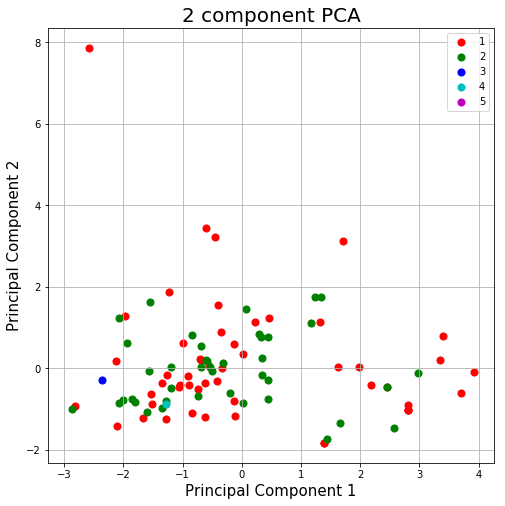

In [70]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets= [1,2,3,4,5] # category values
colors = ['r','g','b','c','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [71]:
# Apply PCA on ISI, DMC and DC to get the latent variable FWI
from sklearn.preprocessing import StandardScaler
features = ['DMC','DC','ISI']

# Separating out the features
X = dataset.iloc[:, [5,6,7]].values


# Separating out the target
Y= dataset.iloc[:, [13]].values

# Standardizing the features
X= StandardScaler().fit_transform(X)

In [72]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component1','principal component2'])

In [73]:
finalDf = pd.concat([principalDf, dataset[['category']]], axis = 1)

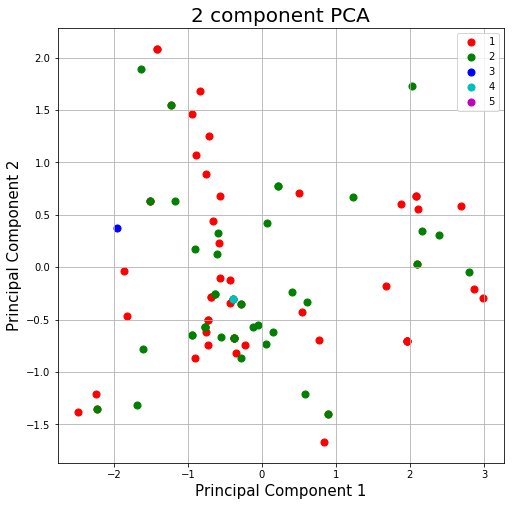

In [74]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets= [1,2,3,4,5]
colors = ['r','g','b','c','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [75]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.272727
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.626522
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,4.000000


In [76]:
# Data preperation 
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

dataset['month'] = [months_table.index(month) for month in dataset['month'] ]
dataset['day'] =   [days_table.index(day)     for day   in dataset['day']   ]

dataset['X'] -= 1
dataset['Y'] -= 2

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,6,3,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,6,2,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,6,2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,7,4,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,7,4,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [77]:
# Excluding row headers
for idx in list(range(4, number_of_columns - 1)):  
    dataset[fires_attributes[idx]] = dataset[fires_attributes[idx]] - \
                                   dataset[fires_attributes[idx]].mean()

In [78]:
statistics = [dataset[fires_attributes[idx]].mean() for idx in range(0, number_of_columns)]
statistics = pandas.DataFrame(statistics, 
                              index=fires_attributes,
                              columns=['mean'])

In [79]:
# Mean for FFMC through Rain is 0.000
statistics.T

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
mean,3.669246,2.299807,6.475822,2.972921,2.319091e-13,-1.665721e-14,4.511190e-13,-3.411842e-15,1.504921e-15,9.029528e-15,-7.868196e-16,4.262655e-17,4.892712e-15,0.272727


In [80]:
statistics = list()
# Apply OLS and Print OLS regression results
for idx in range(0, number_of_columns - 1):
    model = smf.ols(formula = "category ~ " + 
                    fires_attributes[idx], data = dataset).fit()
    title = 'Model: category ~ ' + fires_attributes[idx]
    print('category vs ' + fires_attributes[idx])
    print(model.summary())
    statistics.append([model.f_pvalue, model.rsquared])

category vs X
                            OLS Regression Results                            
Dep. Variable:               category   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.924
Date:                Tue, 23 Oct 2018   Prob (F-statistic):              0.166
Time:                        23:49:30   Log-Likelihood:                -490.39
No. Observations:                 517   AIC:                             984.8
Df Residuals:                     515   BIC:                             993.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2121      0.052      

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
category vs DC
                            OLS Regression Results                            
Dep. Variable:               category   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.241
Date:                Tue, 23 Oct 2018   Prob (F-statistic):              0.266
Time:                        23:49:30   Log-Likelihood:                -490.73
No. Observations:                 517   AIC:                             985.5
Df Residuals:                     515   BIC:                             994.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

category vs rain
                            OLS Regression Results                            
Dep. Variable:               category   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6304
Date:                Tue, 23 Oct 2018   Prob (F-statistic):              0.428
Time:                        23:49:31   Log-Likelihood:                -491.04
No. Observations:                 517   AIC:                             986.1
Df Residuals:                     515   BIC:                             994.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2727      0.028   

In [81]:
statistics = pandas.DataFrame(statistics, 
                              index=fires_attributes[: number_of_columns - 1], 
                              columns=['p-value', 'R-squared'])
statistics.T

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
p-value,0.166003,0.876359,0.052031,0.788871,0.482815,0.230321,0.265767,0.707808,0.185716,0.253070,0.225647,0.427576,2.213121e-50
R-squared,0.003722,0.000047,0.007310,0.000139,0.000957,0.002793,0.002404,0.000273,0.003398,0.002536,0.002849,0.001223,3.514604e-01


In [82]:
statistics[statistics['p-value'] < 0.20]


,p-value,R-squared
X,1.660026e-01,0.003722
month,5.203068e-02,0.007310
temp,1.857157e-01,0.003398
area,2.213121e-50,0.351460


In [83]:
print((smf.ols(formula = "category ~ temp", data = dataset).fit()).summary())


                            OLS Regression Results                            
Dep. Variable:               category   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.756
Date:                Tue, 23 Oct 2018   Prob (F-statistic):              0.186
Time:                        23:49:33   Log-Likelihood:                -490.48
No. Observations:                 517   AIC:                             985.0
Df Residuals:                     515   BIC:                             993.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2727      0.028      9.905      0.0

In [84]:
# Combination of all variables
explanatory_variables = "X + Y + month + day + FFMC + DMC + DC + ISI + temp + RH + " + \
                        "wind + rain + area" 
response_variable =     "category"

model = smf.ols(formula = response_variable + " ~ " + explanatory_variables, 
                data = dataset).fit()

                            OLS Regression Results                            
Dep. Variable:               category   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     22.25
Date:                Tue, 23 Oct 2018   Prob (F-statistic):           5.70e-42
Time:                        23:49:35   Log-Likelihood:                -373.90
No. Observations:                 517   AIC:                             775.8
Df Residuals:                     503   BIC:                             835.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0563      0.154      0.365      0.7

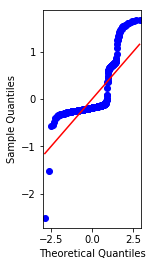

In [85]:
print(model.summary())
ax1 = plt.subplot(1, 3, 1)
qq_plot = sm.qqplot(model.resid, line = 'r', ax = ax1)

In [86]:
X = dataset.iloc[:, 5:6:7].values 
Y = dataset.iloc[:, 13].values

In [87]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

In [88]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
print(regressor.intercept_)

0.23543076914745173


In [90]:
print(regressor.coef_)

[0.00011592]


In [91]:
Y_pred = regressor.predict(X_test)

In [92]:
df = pandas.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}).reset_index() 
df

,index,Actual,Predicted
0,0,1,0.228629
1,1,0,0.232397
2,2,0,0.237660
3,3,2,0.238031
4,4,0,0.233058
5,5,0,0.238946
6,6,0,0.228386
7,7,0,0.238958
8,8,1,0.245079
9,9,0,0.223506


In [93]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.48194147618595595
Mean Squared Error: 0.5261115625570242
Root Mean Squared Error: 0.7253354827643718


### Future scope:
    Further to this – category can be derived using logistic regression and used to predict forest fires which would be a Boolean of true/false. 

##  Logistic Regression


### Team Contribution:
- Analyzing Attribute data - Anu
- Data Preperation - Saloni
- Attempt to use Linear Regresion for Classification - Anu, Ravali and Saloni
  -  Predicting a Continuous Response
- Predicting a Categorical Response - Anu, Ravali and Saloni
- Use Logistic Regression instead - Anu, Ravali and Saloni
- Use Sigmoid function to classify - Ravali

Objective:To analyze the dataset for forest fires and to predict forest fires based on temperature and area values by using Logistic Regression.


In [94]:
# forestfire identification dataset
import pandas as pd
col_names = ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','category']
fire = pd.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')
fire.sort_values('temp', inplace=True)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
280,4,6,dec,fri,84.7,26.7,352.6,4.1,2.2,59,4.9,0.0,9.27,0
282,6,3,feb,sun,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0,0.00,0
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,0
278,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03,1
277,3,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73,1


### Data Enrichment
We have added additional column named as “category” and we have populated this column by grouping area values into five categories. 


In [95]:
print(fire.head())

     X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain   area  \
280  4  6   dec  fri  84.7  26.7  352.6  4.1   2.2  59   4.9   0.0   9.27   
282  6  3   feb  sun  84.9  27.5  353.5  3.4   4.2  51   4.0   0.0   0.00   
279  4  4   dec  mon  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0   9.77   
278  4  4   dec  mon  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0  22.03   
277  3  4   dec  mon  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0  10.73   

     category  
280         0  
282         0  
279         0  
278         1  
277         1  


### Data Wrangling and Preparation
Studied the different dimensions in the dataset and visualized using scatterplot and Line of Best Fit. We have converted day and month data from strings to numeric values. As part of categorizing/classifying "area" we have used area_pred, category and category_pred. We are dividing the "area" into 5 categories and using Logistic Regression, we are predicting the probability of fire in a given area for 'X' value of temperature.

In [96]:
fires_attributes = fire.columns.values.tolist()
number_of_columns = len(fires_attributes)
# Data preperation - Convert month and day from string values to numerical values
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

fire['month'] = [months_table.index(month) for month in fire['month'] ]
fire['day'] =   [days_table.index(day)     for day   in fire['day']   ]

fire['X'] -= 1
fire['Y'] -= 2

fire.head()
# Excluding row headers
for idx in list(range(4, number_of_columns - 1)):  
    fire[fires_attributes[idx]] = fire[fires_attributes[idx]] - \
                                   fire[fires_attributes[idx]].mean()

In [97]:
print(fire)

     X  Y  month  day       FFMC        DMC          DC        ISI       temp  \
280  3  4     11    5  -5.944681  -84.17234 -195.340039  -4.921663 -16.689168   
282  5  1      1    0  -5.744681  -83.37234 -194.440039  -5.621663 -14.689168   
279  3  2     11    1  -5.244681  -85.47234 -198.240039  -6.421663 -14.289168   
278  3  2     11    1  -5.244681  -85.47234 -198.240039  -6.421663 -14.289168   
277  2  2     11    1  -5.244681  -85.47234 -198.240039  -6.421663 -14.289168   
276  3  2     11    1  -5.244681  -85.47234 -198.240039  -6.421663 -14.289168   
465  1  0      1    6 -11.144681 -107.27234 -532.640039  -7.221663 -14.289168   
463  5  3      1    2 -15.544681 -106.47234 -531.740039  -7.121663 -14.289168   
273  3  4     11    0  -6.244681  -83.67234 -194.440039  -2.221663 -14.089168   
211  6  2      7    6   2.855319   28.52766   46.259961  11.278337 -13.789168   
464  5  2      1    2 -15.544681 -106.47234 -531.740039  -7.121663 -13.789168   
274  7  4     11    3  -6.64

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

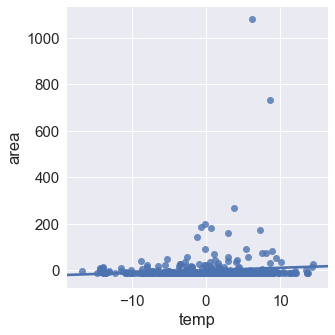

In [99]:
sns.lmplot(x='temp', y='area', data=fire, ci=None)

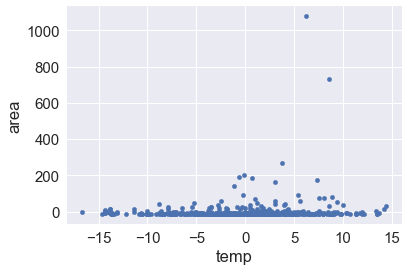

In [100]:
# scatter plot using Pandas
fire.plot(kind='scatter', x='temp', y='area')

Text(0,0.5,'area')

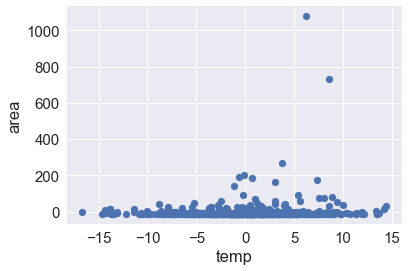

In [101]:
# equivalent scatter plot using Matplotlib
plt.scatter(fire.temp, fire.area)
plt.xlabel('temp')
plt.ylabel('area')

### Attempt to use Linear Regression for Classification

In [102]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['temp']
X = fire[feature_cols]
y=fire.area
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
# make predictions for all values of X
fire['area_pred'] = linreg.predict(X)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category,area_pred
280,3,4,11,5,-5.944681,-84.17234,-195.340039,-4.921663,-16.689168,14.711799,0.882398,-0.021663,-3.577292,0,-17.901263
282,5,1,1,0,-5.744681,-83.37234,-194.440039,-5.621663,-14.689168,6.711799,-0.017602,-0.021663,-12.847292,0,-15.756008
279,3,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,-3.077292,0,-15.326957
278,3,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,9.182708,1,-15.326957
277,2,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,-2.117292,1,-15.326957


Text(0,0.5,'Predicted area')

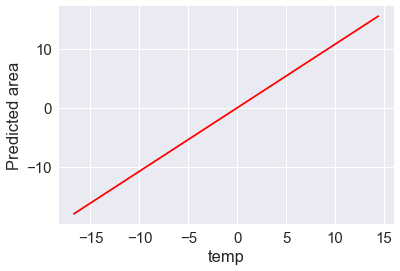

In [104]:
# plot those predictions connected by a line
plt.plot(fire.temp, fire.area_pred, color='red')
plt.xlabel('temp')
plt.ylabel('Predicted area')

Text(0,0.5,'area')

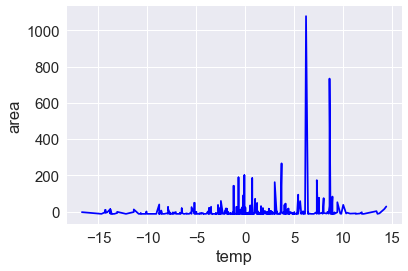

In [105]:
# plot those predictions connected by a line
plt.plot(fire.temp, fire.area, color='blue')
plt.xlabel('temp')
plt.ylabel('area')

### Line of Best Fit

Text(0,0.5,'area')

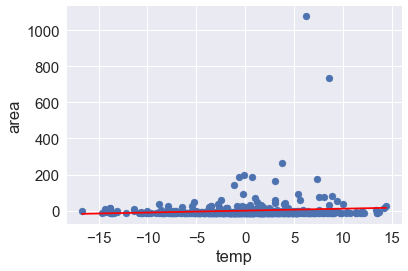

In [106]:
# put the plots together
plt.scatter(fire.temp, fire.area)
plt.plot(fire.temp, fire.area_pred, color='red')
plt.xlabel('temp')
plt.ylabel('area')

### Interpreting Linear Regression Coefficients

In [107]:
# compute prediction for temp=30 using the equation
linreg.intercept_ + linreg.coef_ *30

array([32.17882863])

In [108]:
# compute prediction for temp=30 using the predict method
linreg.predict(30)

array([32.17882863])

In [109]:
# examine coefficient for temp
zip(feature_cols, linreg.coef_)

In [110]:
linreg.predict(80)

array([85.81020968])

### Predicting Categorical Response

Text(0,0.5,'category')

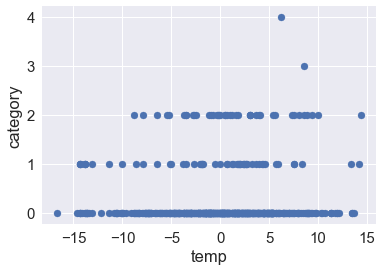

In [111]:
plt.scatter(fire.temp, fire.category)
plt.xlabel('temp')
plt.ylabel('category')

In [112]:
# fit a linear regression model and store the predictions
feature_cols = ['temp']
X = fire[feature_cols]
y = fire.category
linreg.fit(X, y)
fire['category_pred'] = linreg.predict(X)

- Lets draw a Regression Line like before

Text(0,0.5,'category_pred')

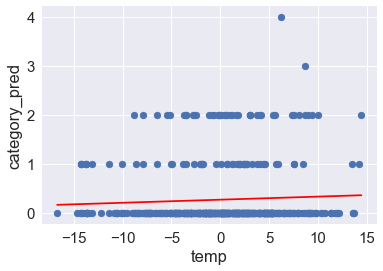

In [113]:
# scatter plot that includes the regression line
plt.scatter(fire.temp, fire.category)
plt.plot(fire.temp, fire.category_pred,color='red')
plt.xlabel('temp')
plt.ylabel('category_pred')

### Calculating the cut off value 
- When temp=0, the Regression Line crosses the midpoint between the predicting classes - temp and category_pred. Hence, when the category_pred > 0.4, then we predict it as 1 else we predict it as 0.

In [114]:
import numpy as np

# transform category_pred_class to 1 or 0
fire['category_pred_class'] = np.where(fire.category > 0.4, 1, 0)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category,area_pred,category_pred,category_pred_class
280,3,4,11,5,-5.944681,-84.17234,-195.340039,-4.921663,-16.689168,14.711799,0.882398,-0.021663,-3.577292,0,-17.901263,0.167758,0
282,5,1,1,0,-5.744681,-83.37234,-194.440039,-5.621663,-14.689168,6.711799,-0.017602,-0.021663,-12.847292,0,-15.756008,0.180337,0
279,3,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,-3.077292,0,-15.326957,0.182853,0
278,3,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,9.182708,1,-15.326957,0.182853,1
277,2,2,11,1,-5.244681,-85.47234,-198.240039,-6.421663,-14.289168,-23.288201,4.482398,-0.021663,-2.117292,1,-15.326957,0.182853,1


Text(0,0.5,'category')

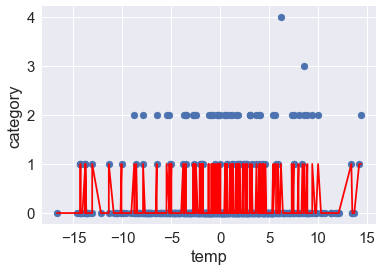

In [115]:
# plot the class predictions
plt.scatter(fire.temp, fire.category)
plt.plot(fire.temp, fire.category_pred_class, color='red')
plt.xlabel('temp')
plt.ylabel('category')

### Using Logistic Regression Instead

In [116]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['temp']
X = fire[feature_cols]
y = fire.category
logreg.fit(X, y)
fire['category_pred_class'] = logreg.predict(X)

Text(0,0.5,'category')

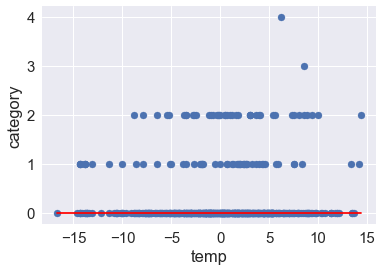

In [117]:
# plot the class predictions
plt.scatter(fire.temp, fire.category)
plt.plot(fire.temp, fire.category_pred_class, color='red')
plt.xlabel('temp')
plt.ylabel('category')

- What if we wanted the predicted probabilities instead of just the class predictions, 
to understand how confident we are in a given prediction

In [118]:
# store the predicted probabilites of class
fire['category_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0,0.5,'category')

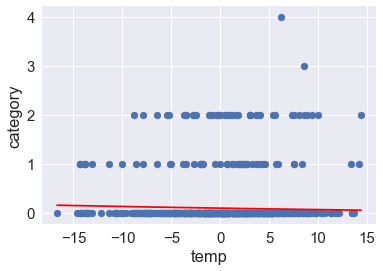

In [119]:
# plot the predicted probabilities
plt.scatter(fire.temp, fire.category)
plt.plot(fire.temp, fire.category_pred_prob, color='red')
plt.xlabel('temp')
plt.ylabel('category')

- We are dividing the "area" into 5 categories and using Logistic Regression, we are predicting the probability of fire in a given area for 'X' value of temperature.

In [120]:
# examine some example predictions
logreg.predict_proba(13.1)

array([[0.76525312, 0.06179271, 0.1279477 , 0.02924333, 0.01576313]])

In [121]:
logreg.predict_proba(21.9)

array([[0.52755207, 0.03217008, 0.12647117, 0.24458929, 0.06921739]])

In [122]:
logreg.predict_proba(18.8)

array([[0.63875786, 0.04302349, 0.13523398, 0.13845191, 0.04453275]])

### Apply Sigmoid function to classify

In [123]:
import math

def sigmoid(X):
    return 1 / (1 + math.e ** -X)

In [124]:
y = sigmoid(X)

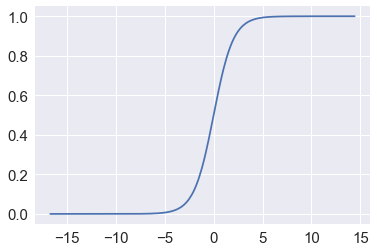

In [125]:
plt.plot(X,y)
plt.show()

In [126]:
X = fire.iloc[:, 5].values 
Y = fire.iloc[:, 13].values

In [127]:
import numpy

mean_x=numpy.mean(X)
mean_y=numpy.mean(Y)
n=len(X)
number=0
denom=0
for i in range(n):
    number+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=number/denom
b0=mean_y-(b1*mean_x)

0.0005169594118355848 0.27272727272727276
181.427659574468 -110.772340425532


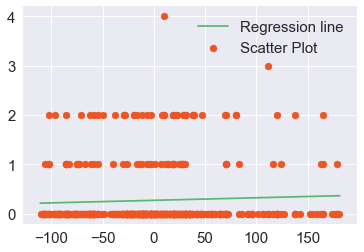

In [128]:
#printing slope and coefficient
print(b1,b0)
max_x=np.max(X)+1
min_x=np.min(X)-1
print(max_x,min_x)
x=np.linspace(min_x,max_x,100)
y=b0+b1*x

#plotting the linear regression line and the actual data points
plt.plot(x,y,color='#58b970',label='Regression line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')
plt.legend()
plt.show()

- If the values are near 0.5, for a given temperature there is 50 percent probability that a fire would happen.

In [129]:
sigmoid(0.0005169594118355848)

0.5001292398500806

# Decision Tree

### Team Contribution:

- Decision tree Classifier - Anu
- Decision tree for Regressor - Ravali
- Decision tree Classifier using python functions - Saloni

Objective:To analyze the dataset for forest fires and to predict forest fires based on input values provided by the dataset by using Decision Trees.

- In this assignment, we are making use of Decision tree Classifier as well as Decision tree Regressor to classify categorical value. 

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image

%matplotlib inline

In [131]:
df = pd.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')

In [132]:
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

df['month'] = [months_table.index(month) for month in df['month'] ]
df['day'] =   [days_table.index(day)     for day   in df['day']   ]

df['X'] -= 1
df['Y'] -= 2

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,6,3,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,6,2,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,6,2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,7,4,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,7,4,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [133]:
df.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,6,3,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,6,2,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,6,2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0


In [134]:
df.dtypes

X             int64
Y             int64
month         int64
day           int64
FFMC        float64
DMC         float64
DC          float64
ISI         float64
temp        float64
RH            int64
wind        float64
rain        float64
area        float64
category      int64
dtype: object

In [135]:
features = df.drop(['area','category'], axis=1)
target = df.loc[:, ['category']]

In [136]:
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)


In [137]:
print(X_train.shape)


(387, 12)


In [138]:
print(y_train.shape)


(387, 1)


In [139]:
print(X_test.shape)


(130, 12)


In [140]:
print(y_test.shape)


(130, 1)


### Decision Tree Classifier

In [143]:
from sklearn.tree import tree

In [144]:
classifier = tree.DecisionTreeClassifier()
classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [145]:
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
y_pred = classifier.predict(X_test)

In [147]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7230769230769231

In [148]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[92 11  7  0]
 [ 5  1  1  0]
 [10  1  1  0]
 [ 1  0  0  0]]
             precision    recall  f1-score   support

          0       0.85      0.84      0.84       110
          1       0.08      0.14      0.10         7
          2       0.11      0.08      0.10        12
          3       0.00      0.00      0.00         1

avg / total       0.74      0.72      0.73       130



C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [149]:
y_test.head(10)

,category
270,0
90,0
133,0
221,2
224,2
286,0
159,0
47,0
298,0
406,0


In [150]:
y_pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [152]:
from sklearn import tree

#tree.export_graphviz(classifier,out_file='C:/Fall2018/ML/classifiertree.dot',feature_names=features.columns)
from subprocess import call
#call(['dot', '-T', 'png', 'C:/Fall2018/ML/classifiertree.dot', '-o', 'classifiertree.png'])

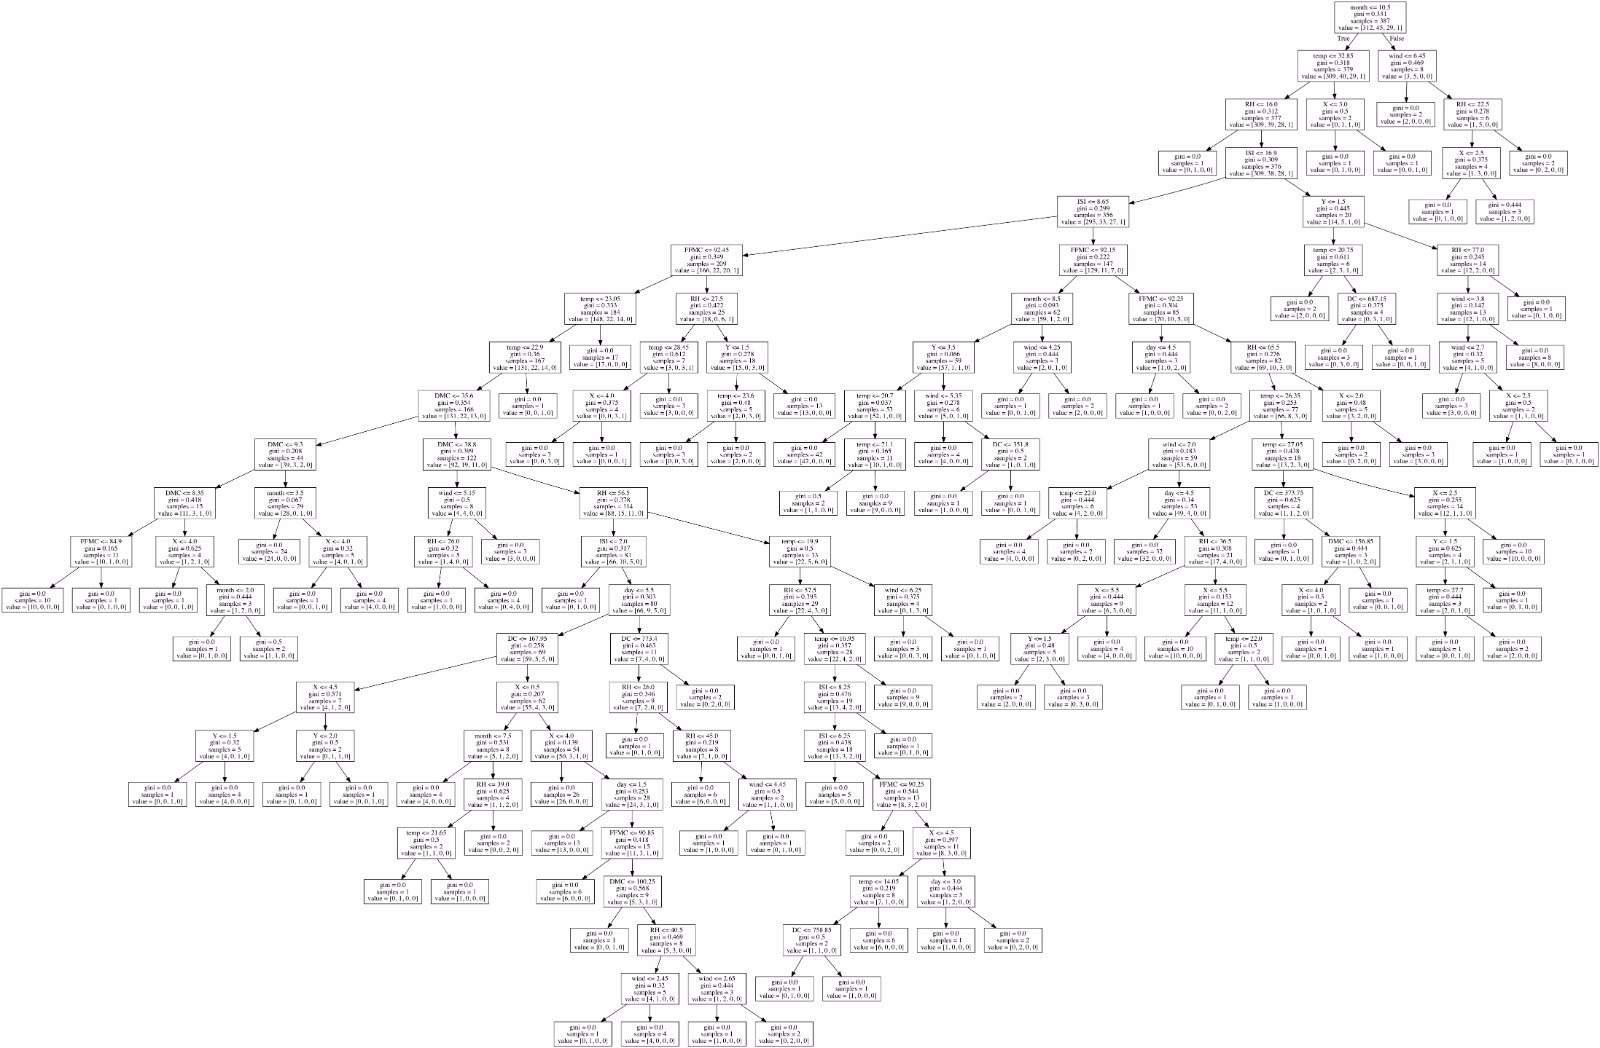

###  Decision Tree Regressor


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image

%matplotlib inline

In [154]:
df = pd.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')

In [155]:
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

df['month'] = [months_table.index(month) for month in df['month'] ]
df['day'] =   [days_table.index(day)     for day   in df['day']   ]

df['X'] -= 1
df['Y'] -= 2

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,6,3,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,6,2,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,6,2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,7,4,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,7,4,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [156]:
df.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,6,3,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,6,2,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,6,2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0


In [157]:
df.dtypes


X             int64
Y             int64
month         int64
day           int64
FFMC        float64
DMC         float64
DC          float64
ISI         float64
temp        float64
RH            int64
wind        float64
rain        float64
area        float64
category      int64
dtype: object

In [158]:
features = df.loc[:, df.columns != 'category, area']
target = df.loc[:, ['category']]

In [159]:
# test_size: what proportion of original data is used for test set
X_traindata, X_testdata, y_traindata, y_testdata = train_test_split(features, target, random_state=1)

In [160]:
print(X_traindata.shape)


(387, 14)


In [161]:
print(y_traindata.shape)


(387, 1)


In [162]:
print(X_testdata.shape)


(130, 14)


In [163]:
print(y_testdata.shape)


(130, 1)


In [164]:
from sklearn.tree import DecisionTreeRegressor


In [165]:
regr = DecisionTreeRegressor(max_depth = 3)
regr

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [166]:
regr.fit(X_traindata, y_traindata)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [167]:
y_predict = regr.predict(X_testdata)

In [168]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testdata, y_predict))  
print(classification_report(y_testdata, y_predict)) 

[[110   0   0   0   0]
 [  0   7   0   0   0]
 [  0   0  12   0   0]
 [  0   0   0   0   1]
 [  0   0   0   0   0]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       110
        1.0       1.00      1.00      1.00         7
        2.0       1.00      1.00      1.00        12
        3.0       0.00      0.00      0.00         1
        4.0       0.00      0.00      0.00         0

avg / total       0.99      0.99      0.99       130



C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [169]:
y_testdata

,category
270,0
90,0
133,0
221,2
224,2
286,0
159,0
47,0
298,0
406,0


In [170]:
y_predict

array([0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       2., 0., 0., 0., 0., 0., 1., 0., 2., 0., 0., 0., 2., 0., 1., 0., 0.,
       4., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0.])

In [172]:
from sklearn import tree

#tree.export_graphviz(regr,out_file='/Users/ravalinagabandi/Desktop/sjsu/Sem III/Machine Learning/Foresr Fires/regressortree.dot',feature_names=features.columns.values)
from subprocess import call
#call(['dot', '-T', 'png', '/Users/ravalinagabandi/Desktop/sjsu/Sem III/Machine Learning/Foresr Fires/regressortree.dot', '-o', 'regressortree.png'])

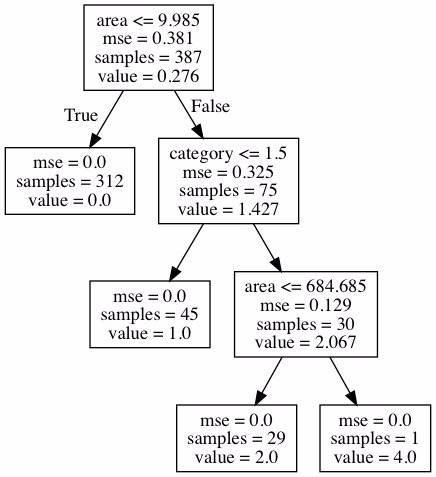

### Future work:
- Using Decision tree, we understood that month is one of the important factors in predicting fire. In all the previous algorithms, it was observed that temp is the important factor that predicts the occurence of forest fire. We will be investigating on these lines further for this project.

# Random Forest Classifier 

##    Team Contribution:

1.  Data pre-processing - Anu, Saloni
2.   Training the model - Ravali, Saloni
3.   Evaluating the model - Ravali, Anu

Objective:To analyze the dataset for forest fires and to compare the predictions got using decision tree classifier and random forest classifier


### Part-1 : Decision tree for predicting forest fires -recap


In [173]:
import pandas as pd
col_names = ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','category']
fire = pd.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')
fire.sort_values('temp', inplace=True)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
280,4,6,dec,fri,84.7,26.7,352.6,4.1,2.2,59,4.9,0.0,9.27,0
282,6,3,feb,sun,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0,0.00,0
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,0
278,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03,1
277,3,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73,1


In [174]:
fires_attributes = fire.columns.values.tolist()
number_of_columns = len(fires_attributes)
# Data preperation - Convert month and day from string values to numerical values
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

fire['month'] = [months_table.index(month) for month in fire['month'] ]
fire['day'] =   [days_table.index(day)     for day   in fire['day']   ]

fire['X'] -= 1
fire['Y'] -= 2

fire.head()
# Excluding row headers
for idx in list(range(4, number_of_columns - 1)):  
    fire[fires_attributes[idx]] = fire[fires_attributes[idx]] - \
                                   fire[fires_attributes[idx]].mean()

In [175]:
from sklearn.tree import DecisionTreeClassifier
X = fire.drop(['area','category'],axis=1)
Y = fire.loc[:, ['category']]

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [177]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [178]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Accuracy Score using Decision Tree Classifier for predicting forest fires 

In [179]:
y_predict = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7307692307692307

### Part 2 Using Random Forest Classifier

In [180]:
import pandas as pd
col_names = ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','category']
fire = pd.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')
fire.sort_values('temp', inplace=True)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
280,4,6,dec,fri,84.7,26.7,352.6,4.1,2.2,59,4.9,0.0,9.27,0
282,6,3,feb,sun,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0,0.00,0
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,0
278,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03,1
277,3,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73,1


In [181]:
fires_attributes = fire.columns.values.tolist()
number_of_columns = len(fires_attributes)
# Data preperation - Convert month and day from string values to numerical values
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

fire['month'] = [months_table.index(month) for month in fire['month'] ]
fire['day'] =   [days_table.index(day)     for day   in fire['day']   ]

fire['X'] -= 1
fire['Y'] -= 2

fire.head()
# Excluding row headers
for idx in list(range(4, number_of_columns - 1)):  
    fire[fires_attributes[idx]] = fire[fires_attributes[idx]] - \
                                   fire[fires_attributes[idx]].mean()

In [182]:
print(fire.head())

     X  Y  month  day      FFMC       DMC          DC       ISI       temp  \
280  3  4     11    5 -5.944681 -84.17234 -195.340039 -4.921663 -16.689168   
282  5  1      1    0 -5.744681 -83.37234 -194.440039 -5.621663 -14.689168   
279  3  2     11    1 -5.244681 -85.47234 -198.240039 -6.421663 -14.289168   
278  3  2     11    1 -5.244681 -85.47234 -198.240039 -6.421663 -14.289168   
277  2  2     11    1 -5.244681 -85.47234 -198.240039 -6.421663 -14.289168   

            RH      wind      rain       area  category  
280  14.711799  0.882398 -0.021663  -3.577292         0  
282   6.711799 -0.017602 -0.021663 -12.847292         0  
279 -23.288201  4.482398 -0.021663  -3.077292         0  
278 -23.288201  4.482398 -0.021663   9.182708         1  
277 -23.288201  4.482398 -0.021663  -2.117292         1  


In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
X = fire.drop(['area','category'],axis=1)
Y = fire.loc[:, ['category']]

In [185]:
rnc = RandomForestClassifier(n_estimators = 200)

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [187]:
rnc.fit(X_train, y_train)

C:\Users\anuks\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [188]:
pred = rnc.predict(X_test)

### Accuracy Score using Random Forest Classifier

In [189]:
y_predict = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9230769230769231

### Conclusion : Random Forest Classifier is better suited for predicting forest fires than decision tree classifier.

## Naive Bayes

### Team Contribution:
- Data pre-processing - Anu, Ravali
- Training the model - Ravali, Saloni
- Evaluating the model - Saloni, Anu

Objective:To analyze the dataset for forest fires and to predict occurence of forest fires specific to month attribute by applying Naive Bayes.

In [190]:
import pandas as pd

# load dataset into Pandas DataFrame
dataset = pd.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')

In [191]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.272727
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.626522
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,4.000000


### Data preperation: 
#### Download ntlk to tokenize 'month' values:

In [ ]:
import nltk  
nltk.download()  

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
dataset['month'] = dataset['month'].apply(nltk.word_tokenize)  


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

dataset['month'] = dataset['month'].apply(lambda x: [stemmer.stem(y) for y in x])  

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# This converts the list of words into space-separated strings if there are any
dataset['month'] = dataset['month'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()  
counts = count_vect.fit_transform(dataset['month'])  

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)  

### Training the model:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(counts, dataset['month'], test_size=0.2, random_state=0) 

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_train)

### Evaluate the model:

In [ ]:
import numpy as np

predicted = clf.predict(X_test)

print(np.mean(predicted == Y_test))

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, predicted))  

## KNN  


In [32]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
# Importing the dataset
dataset = pd.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')
# Data preperation - Convert month and day from string values to numerical values
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

dataset['month'] = [months_table.index(month) for month in dataset['month'] ]
dataset['day'] =   [days_table.index(day)     for day   in dataset['day']   ]

dataset['X'] -= 1
dataset['Y'] -= 2

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,6,3,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,6,2,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,6,2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,7,4,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,7,4,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


Predicting fire using attributes temp,wind

In [34]:
X = dataset.iloc[:, [8,9]].values
y = dataset.iloc[:, 13].values

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=101)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

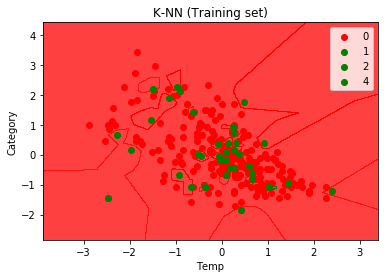

In [39]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Temp')
plt.ylabel('Category')
plt.legend()
plt.show()

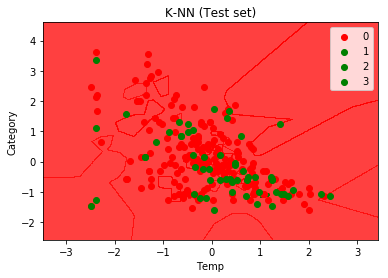

In [40]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Temp')
plt.ylabel('Category')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.6486486486486487

## SVM -  Support Vector Machine 

In [27]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')
X = dataset.iloc[:, [8, 9]].values
y = dataset.iloc[:, 13].values

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

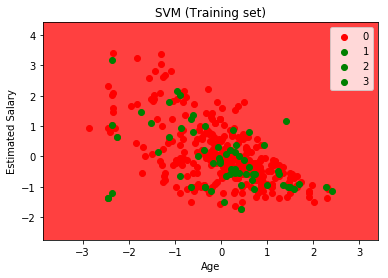

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

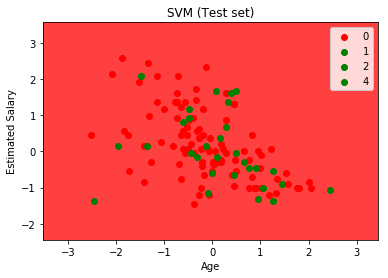

In [30]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.7692307692307693

### Accuracy Score 

* SVM : 76%
* KNN : 64%
* Decision Tree : 73%
* Random Forest : 92%


## Conclusion 

Random Forest Classifier is best suited for predicting the affected area due to forest fire